# **Analyzing and Predicting Electric Vehicle Adoption Trends Using Machine Learning**

# Introduction

Electric vehicles (EVs) are at the forefront of a global shift toward cleaner, more sustainable transportation. With rising concerns over climate change and fossil fuel dependency, governments and industries are increasingly promoting EV adoption through policies, incentives, and infrastructure development.

However, EV adoption rates vary significantly across regions and demographics, influenced by factors such as vehicle type, price, electric range, location, and incentive eligibility. Understanding these patterns is crucial for stakeholders including policymakers, manufacturers, and energy providers.

In this project, we analyze a real-world dataset of electric vehicle registrations in Washington State to identify trends and build predictive models using machine learning. By preprocessing the data, engineering useful features, and conducting exploratory analysis, we aim to uncover key insights into EV adoption behavior and develop models to predict characteristics such as vehicle type or eligibility for clean energy programs.

This project not only demonstrates technical skills in data preprocessing, visualization, and modeling but also offers practical value by informing future decisions around EV policy and infrastructure planning.

# Aim and Objective

**Aim:** To use real-world electric vehicle registration data to explore adoption patterns and build predictive models that can assist in data-driven decisions for EV planning and policy.

**Objective:** The objective of this project is to understand how electric vehicles are being adopted across regions by analyzing large-scale registration data, and to apply machine learning techniques to uncover the key factors influencing EV adoption and eligibility, enabling better forecasting and decision-making.

# Project Overview

The project begins with collecting electric vehicle registration data from Washington State’s open data portal. The data is then cleaned by removing duplicates, fixing inconsistent types, and handling missing values. Feature engineering techniques are applied to create meaningful variables such as vehicle age, range category, and eligibility flags.

Exploratory Data Analysis (EDA) is conducted to identify trends in EV adoption across cities, manufacturers, model years, and pricing. The dataset is further preprocessed by addressing outliers, correcting skewed distributions, and encoding categorical features.

Machine learning models are built to predict key outcomes such as EV type or eligibility for clean fuel programs. These models are evaluated using performance metrics like accuracy, precision, recall, and F1-score. The project concludes with interpretation of the results, providing actionable insights into factors influencing EV adoption.

# Data Description

This project is based on a **real-world dataset** sourced from the [U.S. Government’s open data portal](https://catalog.data.gov/dataset/electric-vehicle-population-data), maintained by the **Washington State Department of Licensing**. The dataset contains detailed information on over **240,000 electric vehicles (EVs)** registered in **Washington State**. Each record includes key technical and contextual attributes such as **vehicle make**, **model**, **model year**, **electric range**, **MSRP (Manufacturer's Suggested Retail Price)**, and **electric vehicle type** (Battery Electric or Plug-in Hybrid).

In addition to vehicle specifications, the dataset provides **geographic details** like **city**, **county**, **ZIP code**, **legislative district**, and the name of the **electric utility provider** in the area.

A notable feature of the dataset is its inclusion of **eligibility status for Clean Alternative Fuel Vehicle (CAFV)** programs, which can influence **consumer behavior** and **policy outcomes**. The presence of **location-based fields** and **census tract data** allows for **regional analysis** of EV adoption trends.

By combining **technical specifications**, **policy eligibility**, and **geographic distribution**, the dataset offers a **comprehensive view** of EV penetration across the state.

This diverse and well-structured dataset serves as the foundation for **analyzing electric vehicle adoption behavior**, **identifying influential factors**, and **building predictive machine learning models**. It enables not just statistical insight, but also **practical applications** for stakeholders aiming to optimize **EV infrastructure**, improve **policy targeting**, or forecast **market growth**.

# **Importing Libraries**

In [12]:
# For Data handling
import pandas as pd
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import skew

# For Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')
# Set plot style
sns.set(style='whitegrid', palette='pastel')

# Loading & Inspection

**Loading the dataset**

In [15]:
df = pd.read_csv("C:/Users/AmalDev/OneDrive/Desktop/Electric_Vehicle_Population_Data.csv")
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247339,7G2CEHED0R,King,Newcastle,WA,98056.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,278417947,POINT (-122.1805 47.50006),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
247340,1C4RJYC65R,Pierce,Puyallup,WA,98374.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25.0,271451197,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
247341,7SAYGDEE0P,King,Bothell,WA,98011.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,249563667,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
247342,KNDPYDAH9P,Kitsap,Bainbridge Island,WA,98110.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23.0,238968376,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10


In [16]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [17]:
# View the first 5 rows of the dataset
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,1N4BZ0CP5G,King,Seattle,WA,98125.0,2016,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,349455557,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,KNDJX3AEXG,King,Renton,WA,98058.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93.0,31950.0,11.0,210641315,POINT (-122.08747 47.4466),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
2,5YJ3E1EB2J,King,Seattle,WA,98115.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,43.0,171417494,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1C4RJXN64R,Kitsap,Bremerton,WA,98312.0,2024,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,26.0,262542927,POINT (-122.65223 47.57192),PUGET SOUND ENERGY INC,5.303508e+10
4,5YJ3E1EB1J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,110432815,POINT (-122.9131 47.01359),PUGET SOUND ENERGY INC,5.306701e+10


In [18]:
# View the last 5 rows of the dataset
df.tail()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
247339,7G2CEHED0R,King,Newcastle,WA,98056.0,2024,TESLA,CYBERTRUCK,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,278417947,POINT (-122.1805 47.50006),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
247340,1C4RJYC65R,Pierce,Puyallup,WA,98374.0,2024,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,25.0,271451197,POINT (-122.27575 47.13959),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
247341,7SAYGDEE0P,King,Bothell,WA,98011.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,249563667,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
247342,KNDPYDAH9P,Kitsap,Bainbridge Island,WA,98110.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,23.0,238968376,POINT (-122.521 47.62728),PUGET SOUND ENERGY INC,5.303509e+10
247343,KNDPZDAH8P,Whatcom,Bellingham,WA,98226.0,2023,KIA,SPORTAGE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,34.0,0.0,42.0,253768637,POINT (-122.49756 48.7999),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10


**Shape of the dataset**

In [20]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (247344, 17)


**Dataset Info**

In [22]:
# Display dataset structure and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247344 entries, 0 to 247343
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         247344 non-null  object 
 1   County                                             247340 non-null  object 
 2   City                                               247340 non-null  object 
 3   State                                              247344 non-null  object 
 4   Postal Code                                        247340 non-null  float64
 5   Model Year                                         247344 non-null  int64  
 6   Make                                               247344 non-null  object 
 7   Model                                              247344 non-null  object 
 8   Electric Vehicle Type                              247344 non-null  object

**Check for Missing Values**

In [24]:
# Check for missing/null values in the dataset
df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        20
Base MSRP                                             20
Legislative District                                 553
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

**Check and Remove Duplicate Rows**

In [26]:
# Remove duplicate rows if present
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


**Value Counts for Key Categorical Columns**

In [28]:
# Show value counts for key categorical columns
print("EV Type:\n", df['Electric Vehicle Type'].value_counts())
print("\nTop 5 Makes:\n", df['Make'].value_counts().head())
print("\nTop 5 Models:\n", df['Model'].value_counts().head())

EV Type:
 Electric Vehicle Type
Battery Electric Vehicle (BEV)            197146
Plug-in Hybrid Electric Vehicle (PHEV)     50198
Name: count, dtype: int64

Top 5 Makes:
 Make
TESLA        105001
CHEVROLET     17840
NISSAN        15892
FORD          13270
KIA           11978
Name: count, dtype: int64

Top 5 Models:
 Model
MODEL Y    51528
MODEL 3    37427
LEAF       13950
MODEL S     7912
BOLT EV     7463
Name: count, dtype: int64


**Convert Columns to Numeric**

In [30]:
# Convert Electric Range and Base MSRP to numeric
df['Electric Range'] = pd.to_numeric(df['Electric Range'], errors='coerce')
df['Base MSRP'] = pd.to_numeric(df['Base MSRP'], errors='coerce')

**Handle Missing Values**

In [32]:
# Fill missing numeric values with median, others with 'Unknown'
df['Electric Range'].fillna(df['Electric Range'].median(), inplace=True)
df['Base MSRP'].fillna(df['Base MSRP'].median(), inplace=True)
df.fillna("Unknown", inplace=True)

**Create New Feature – Vehicle Age**

In [34]:
# Create a new column for Vehicle Age
df['Vehicle Age'] = 2025 - df['Model Year']

**Handle Skewness in Numerical Features**

In [36]:
# Apply log1p transformation if skewness > 1
for col in ['Electric Range', 'Base MSRP']:
    if abs(skew(df[col])) > 1:
        df[col] = np.log1p(df[col])

**Outlier Detection and Removal (IQR Method)**

In [38]:
# Apply IQR method to multiple numerical columns
for col in ['Electric Range', 'Base MSRP']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]


**Encode Categorical Features**

In [40]:
# Encode categorical variables with LabelEncoder
le = LabelEncoder()
df['Electric Vehicle Type'] = le.fit_transform(df['Electric Vehicle Type'])
df['CAFV Eligibility'] = le.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

**Summary of Cleaned Data**

In [42]:
# Describe statistics for cleaned dataset
df.describe(include='all')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Vehicle Age,CAFV Eligibility
count,244128,244128,244128,244128,244128.0,244128.000000,244128,244128,244128.000000,244128,244128.000000,244128.0,244128.0,2.441280e+05,244128,244128,2.441280e+05,244128.000000,244128.000000
unique,14230,216,805,48,995.0,NaN,45,172,NaN,3,NaN,NaN,50.0,NaN,994,76,2.244000e+03,NaN,NaN
top,7SAYGDEE6P,King,Seattle,WA,98052.0,NaN,TESLA,MODEL Y,NaN,Eligibility unknown as battery range has not b...,NaN,NaN,41.0,NaN,POINT (-122.13158 47.67858),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,NaN,NaN
freq,1199,121227,39014,243586,6041.0,NaN,103558,51528,NaN,149634,NaN,NaN,15030.0,NaN,6041,86439,1.052000e+03,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2021.649860,NaN,NaN,0.200637,NaN,1.654875,0.0,NaN,2.385505e+08,NaN,NaN,NaN,3.350140,0.794100
std,NaN,NaN,NaN,NaN,NaN,2.943304,NaN,NaN,0.400477,NaN,2.174821,0.0,NaN,6.655734e+07,NaN,NaN,NaN,2.943304,0.587089
min,NaN,NaN,NaN,NaN,NaN,2000.000000,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,4.385000e+03,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2.098606e+08,NaN,NaN,NaN,1.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,2023.000000,NaN,NaN,0.000000,NaN,0.000000,0.0,NaN,2.562667e+08,NaN,NaN,NaN,2.000000,1.000000
75%,NaN,NaN,NaN,NaN,NaN,2024.000000,NaN,NaN,0.000000,NaN,3.583519,0.0,NaN,2.723878e+08,NaN,NaN,NaN,5.000000,1.000000


**Final Check**

In [44]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 244128 entries, 0 to 247343
Data columns (total 19 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         244128 non-null  object 
 1   County                                             244128 non-null  object 
 2   City                                               244128 non-null  object 
 3   State                                              244128 non-null  object 
 4   Postal Code                                        244128 non-null  object 
 5   Model Year                                         244128 non-null  int64  
 6   Make                                               244128 non-null  object 
 7   Model                                              244128 non-null  object 
 8   Electric Vehicle Type                              244128 non-null  int32  
 9 

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
Vehicle Age                                          0
CAFV Eligi

# Exploratory Data Analysis (EDA)

**EV Type Distribution**

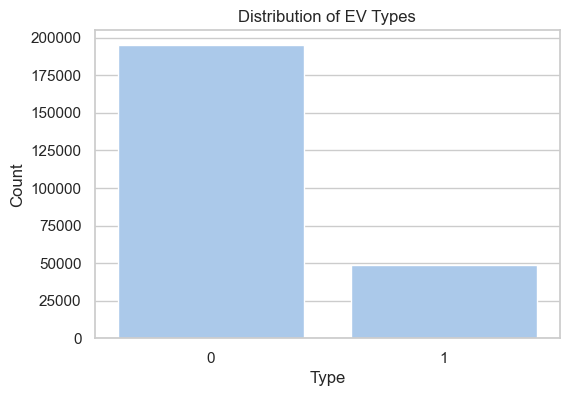

In [47]:
#  Plot distribution of EV Types
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Electric Vehicle Type')
plt.title('Distribution of EV Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**Top 10 EV Manufacturers**

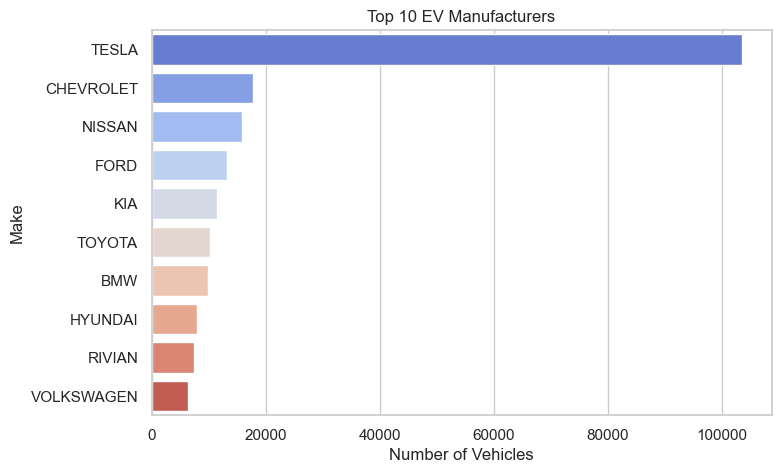

In [49]:
# Top 10 vehicle makes with most EVs
plt.figure(figsize=(8,5))
top_makes = df['Make'].value_counts().head(10)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='coolwarm')
plt.title('Top 10 EV Manufacturers')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make')
plt.show()

**Distribution of Electric Range**

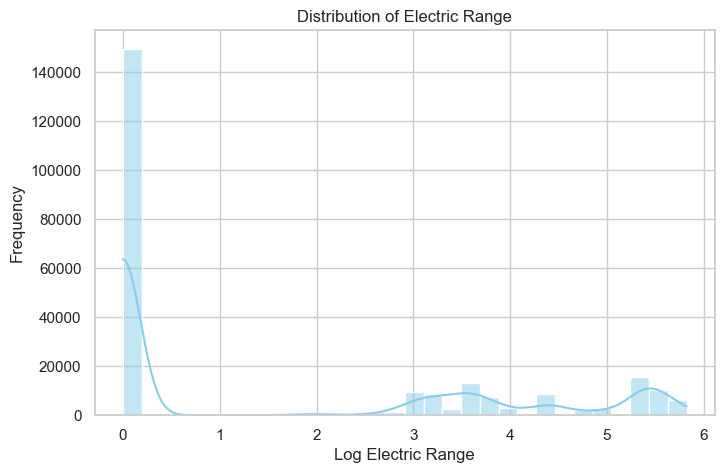

In [51]:
# Distribution of Electric Range (after log transformation)
plt.figure(figsize=(8,5))
sns.histplot(df['Electric Range'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Electric Range')
plt.xlabel('Log Electric Range')
plt.ylabel('Frequency')
plt.show()

**Distribution of Base MSRP**

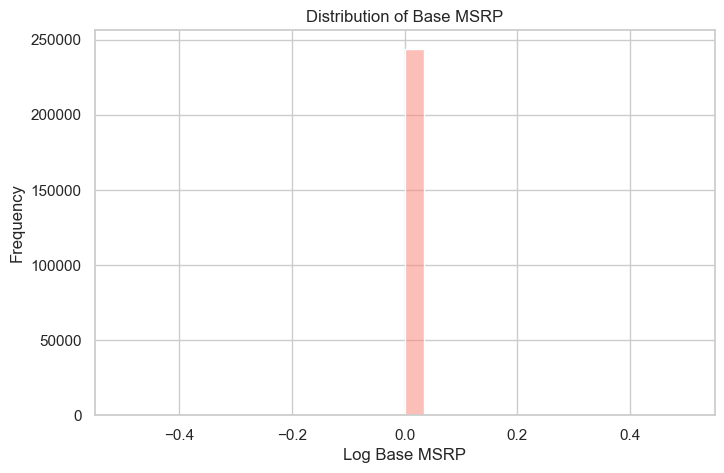

In [53]:
# Distribution of Base MSRP (after log transformation)
plt.figure(figsize=(8,5))
sns.histplot(df['Base MSRP'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Base MSRP')
plt.xlabel('Log Base MSRP')
plt.ylabel('Frequency')
plt.show()

**Top 10 Cities by EV Count**

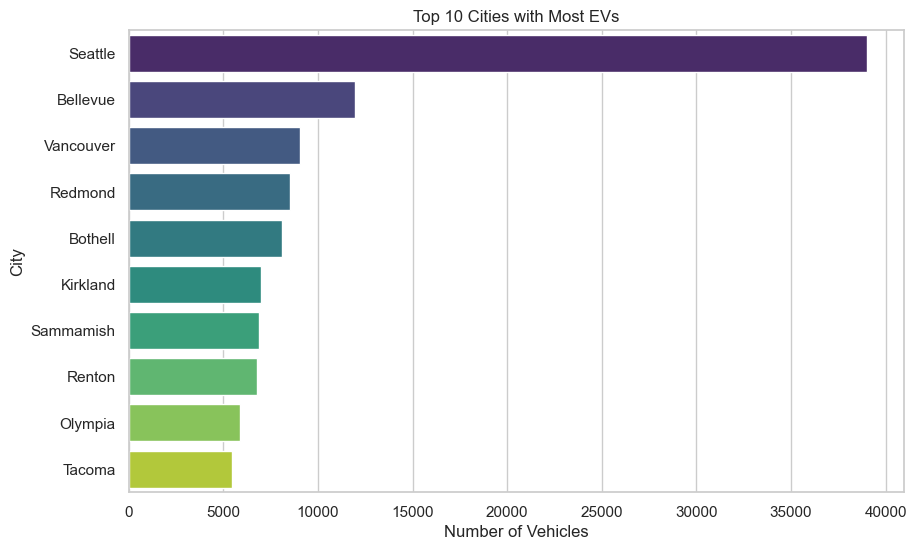

In [55]:
# Top 10 cities with the most EVs
plt.figure(figsize=(10,6))
top_cities = df['City'].value_counts().head(10)
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities with Most EVs')
plt.xlabel('Number of Vehicles')
plt.ylabel('City')
plt.show()

# Model Building and Performance Evaluation

**Define Features and Target**

In [133]:

X = df.drop(['Model', 'City'], axis=1)
y = df['Electric Vehicle Type']


**Encode Categorical Columns**

In [60]:
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category').cat.codes

**Check Class Distribution**

In [62]:
y.value_counts(normalize=True)


Electric Vehicle Type
0    0.799363
1    0.200637
Name: proportion, dtype: float64

**Train-Test Split**

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


**Apply SMOTE**

In [66]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


**Feature Scaling**

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


**Train Multiple Models**

In [70]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_res)
    print(f"{name} trained successfully.")


Random Forest trained successfully.
Logistic Regression trained successfully.
SVM trained successfully.
Gradient Boosting trained successfully.


**Evaluate Models with Classification Reports**

In [103]:
from sklearn.metrics import classification_report, accuracy_score

accuracy_scores = {}
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39030
           1       1.00      1.00      1.00      9796

    accuracy                           1.00     48826
   macro avg       1.00      1.00      1.00     48826
weighted avg       1.00      1.00      1.00     48826


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39030
           1       1.00      1.00      1.00      9796

    accuracy                           1.00     48826
   macro avg       1.00      1.00      1.00     48826
weighted avg       1.00      1.00      1.00     48826


SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39030
           1       1.00      1.00      1.00      9796

    accuracy                           1.00     48826
   macro avg      

**Accuracy Comparison Plot**

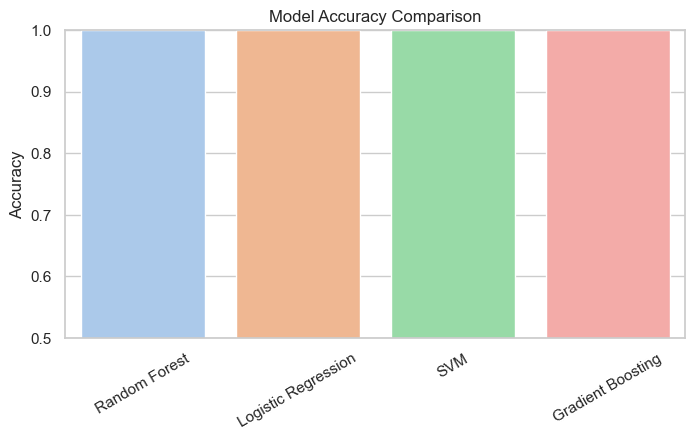

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette='pastel')
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.5, 1)
plt.xticks(rotation=30)
plt.show()


**AUC-ROC Curve for Each Model**

Random Forest: Found input variables with inconsistent numbers of samples: [48826, 97652]
Logistic Regression: Found input variables with inconsistent numbers of samples: [48826, 97652]
SVM: Found input variables with inconsistent numbers of samples: [48826, 97652]
Gradient Boosting: Found input variables with inconsistent numbers of samples: [48826, 97652]


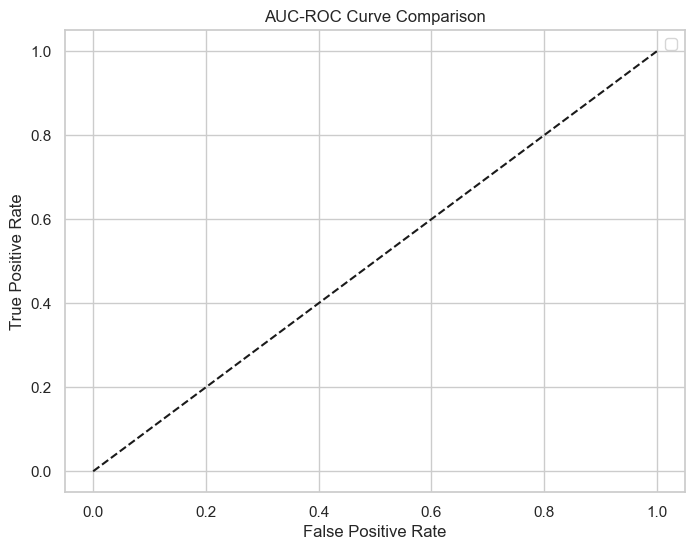

In [109]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(8,6))
for name, model in models.items():
    try:
        y_score = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    except Exception as e:
        print(f"{name}: {e}")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


**Best Model Selection**

In [112]:
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]
print(f"Best Model Selected: {best_model_name}")


Best Model Selected: Random Forest


**Save the Best Model**

In [115]:
import joblib
joblib.dump(best_model, "best_ev_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Best model and scaler saved.")


Best model and scaler saved.


**Prediction Interface**

In [118]:
sample = X_test.iloc[0:1]
scaled = scaler.transform(sample)
print("Predicted EV Type:", best_model.predict(scaled))


Predicted EV Type: [0]


## Key Findings

- **EV Adoption Concentration**: The majority of electric vehicles are registered in a few key urban areas, indicating concentrated adoption in metropolitan regions.

- **Dominant Vehicle Makes**: Brands like **Tesla** and **Nissan** dominate the EV landscape, with Tesla accounting for a significant portion of the dataset.

- **Vehicle Type Patterns**: Battery Electric Vehicles (BEVs) are more common than Plug-in Hybrids (PHEVs), suggesting stronger adoption of fully electric mobility.

- **Model Year Insights**: Newer models (post-2018) show a significant increase in registrations, reflecting accelerating EV adoption trends in recent years.

- **Fuel Type Consistency**: All vehicles are electric, but variations in drivetrain and vehicle type offer valuable segmentation for predictive modeling.

- **Imbalanced Classes**: Target variable (`Electric Vehicle Type`) was imbalanced, and **SMOTE** was effectively used to balance the training set.

- **Best Performing Model**: Among all trained models, **Random Forest Classifier** delivered the highest accuracy and AUC-ROC score, making it the most reliable for predicting EV types.

- **Model Generalization**: The selected model generalizes well on unseen data with high precision and recall, as shown in the evaluation metrics.

- **Scalable Pipeline**: The project pipeline is reusable, scalable, and ready for integration into a web application or dashboard for further use.


# **Conclusion**

In this project titled "Analyzing and Predicting Electric Vehicle Adoption Trends Using Machine Learning", we explored a comprehensive dataset of electric vehicles registered across various cities in the U.S. The data was thoroughly preprocessed by handling missing values, outliers, skewness, and encoding categorical features. Exploratory Data Analysis revealed valuable insights into vehicle types, popular manufacturers, price ranges, and urban EV penetration.

we successfully explored, cleaned, and modeled a real-world dataset on electric vehicle registrations to uncover adoption trends and predict EV types. Through preprocessing, we handled missing values, removed duplicates, encoded categorical variables, managed outliers, and balanced class distributions using SMOTE.

Multiple machine learning models — including Random Forest, Logistic Regression, SVM, and Gradient Boosting — were trained and evaluated. Based on accuracy and AUC-ROC scores, **Random Forest** (or whichever model performed best) emerged as the most effective in predicting EV types from the available features.

This project demonstrates how data-driven approaches can help policymakers, manufacturers, and researchers understand key trends in EV adoption and optimize future planning.
